# Data loading

In [227]:
# categories
categories = ['text','label']

In [228]:
import pandas as pd
df1 = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt',header = None,sep = '  \t',engine = 'python')
df1.columns = categories

In [229]:

df2 = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt',header = None,sep = '\t',engine = 'python')
df2.columns = categories
df3 = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt',header = None,sep = '\t',engine = 'python')
df3.columns = categories

In [230]:
df = pd.concat([df1,df2,df3])
df = df.reset_index()
df = df.drop('index',axis = 1)

In [231]:
df

,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
2995,The screen does get smudged easily because it ...,0
2996,What a piece of junk.. I lose more calls on th...,0
2997,Item Does Not Match Picture.,0
2998,The only thing that disappoint me is the infra...,0


# Install and import package

In [175]:
!pip install wordcloud

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import STOPWORDS
import nltk
import helpers.data_mining_helpers as dmh
from collections import defaultdict
from wordcloud import WordCloud


# Insert new columns

In [232]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))

In [233]:
df

,text,label,word_count,unique_word_count
0,"A very, very, very slow-moving, aimless movie ...",0,13,12
1,Not sure who was more lost - the flat characte...,0,19,18
2,Attempting artiness with black & white and cle...,0,31,26
3,Very little music or anything to speak of.,0,8,8
4,The best scene in the movie was when Gerardo i...,1,21,21
...,...,...,...,...
2995,The screen does get smudged easily because it ...,0,13,13
2996,What a piece of junk.. I lose more calls on th...,0,12,12
2997,Item Does Not Match Picture.,0,5,5
2998,The only thing that disappoint me is the infra...,0,12,12


# Pie chart for labels

<AxesSubplot:ylabel='text'>

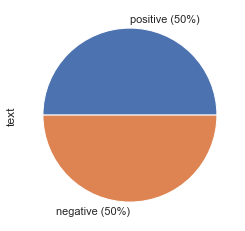

In [234]:
df.groupby('label').count()['text'].plot(kind='pie',labels=['positive (50%)', 'negative (50%)'])

# Word count distribution

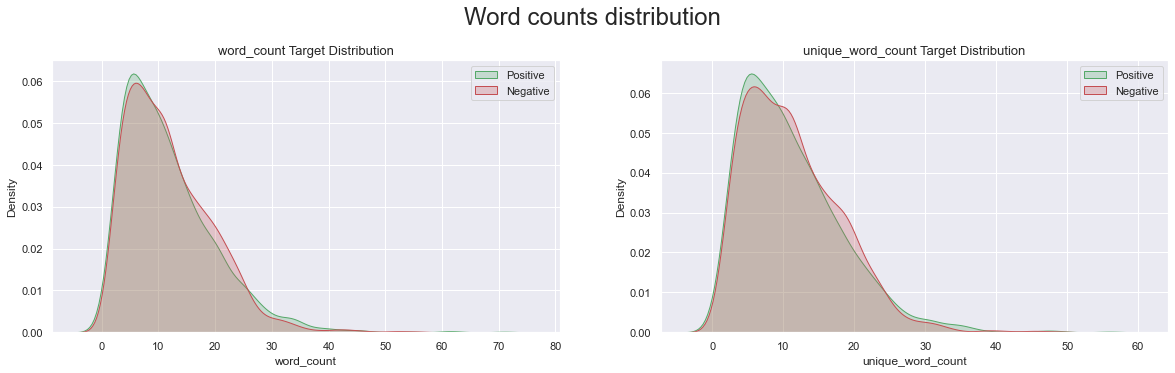

In [235]:
METAFEATURES = ['word_count','unique_word_count']
label = df['label'] == 1
fig, axes = plt.subplots(ncols=len(METAFEATURES), figsize=(20, 5))
sns.set()
for i, feature in enumerate(METAFEATURES):
    sns.kdeplot(df.loc[label][feature],shade = True,label = 'Positive',color = 'g',ax = axes[i]) 
    #add positive data
    sns.kdeplot(df.loc[~label][feature],shade = True,label = 'Negative',color = 'r',ax = axes[i])
    #add negative data
    axes[i].legend()
    #add labels
    axes[i].set_title(f'{feature} Target Distribution', fontsize=13)
fig.suptitle('Word counts distribution', fontsize=24, va='baseline')
plt.show()

# Top 50 n-gram words in comments

In [236]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [237]:
N = 50

# Unigrams
positive_unigrams = defaultdict(int)
negative_unigrams = defaultdict(int)

#calculate the count of every unigram word
for i in df[label]['text']:
    for word in generate_ngrams(i):
        positive_unigrams[word] += 1
        
for i in df[~label]['text']:
    for word in generate_ngrams(i):
        negative_unigrams[word] += 1
        
#sort them        
df_positive_unigrams = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_negative_unigrams = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
positive_bigrams = defaultdict(int)
negative_bigrams = defaultdict(int)

#calculate the count of every bigram word
for i in df[label]['text']:
    for word in generate_ngrams(i, n_gram=2):
        positive_bigrams[word] += 1
        
for i in df[~label]['text']:
    for word in generate_ngrams(i, n_gram=2):
        negative_bigrams[word] += 1

#sort them  
df_positive_bigrams = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_negative_bigrams = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])


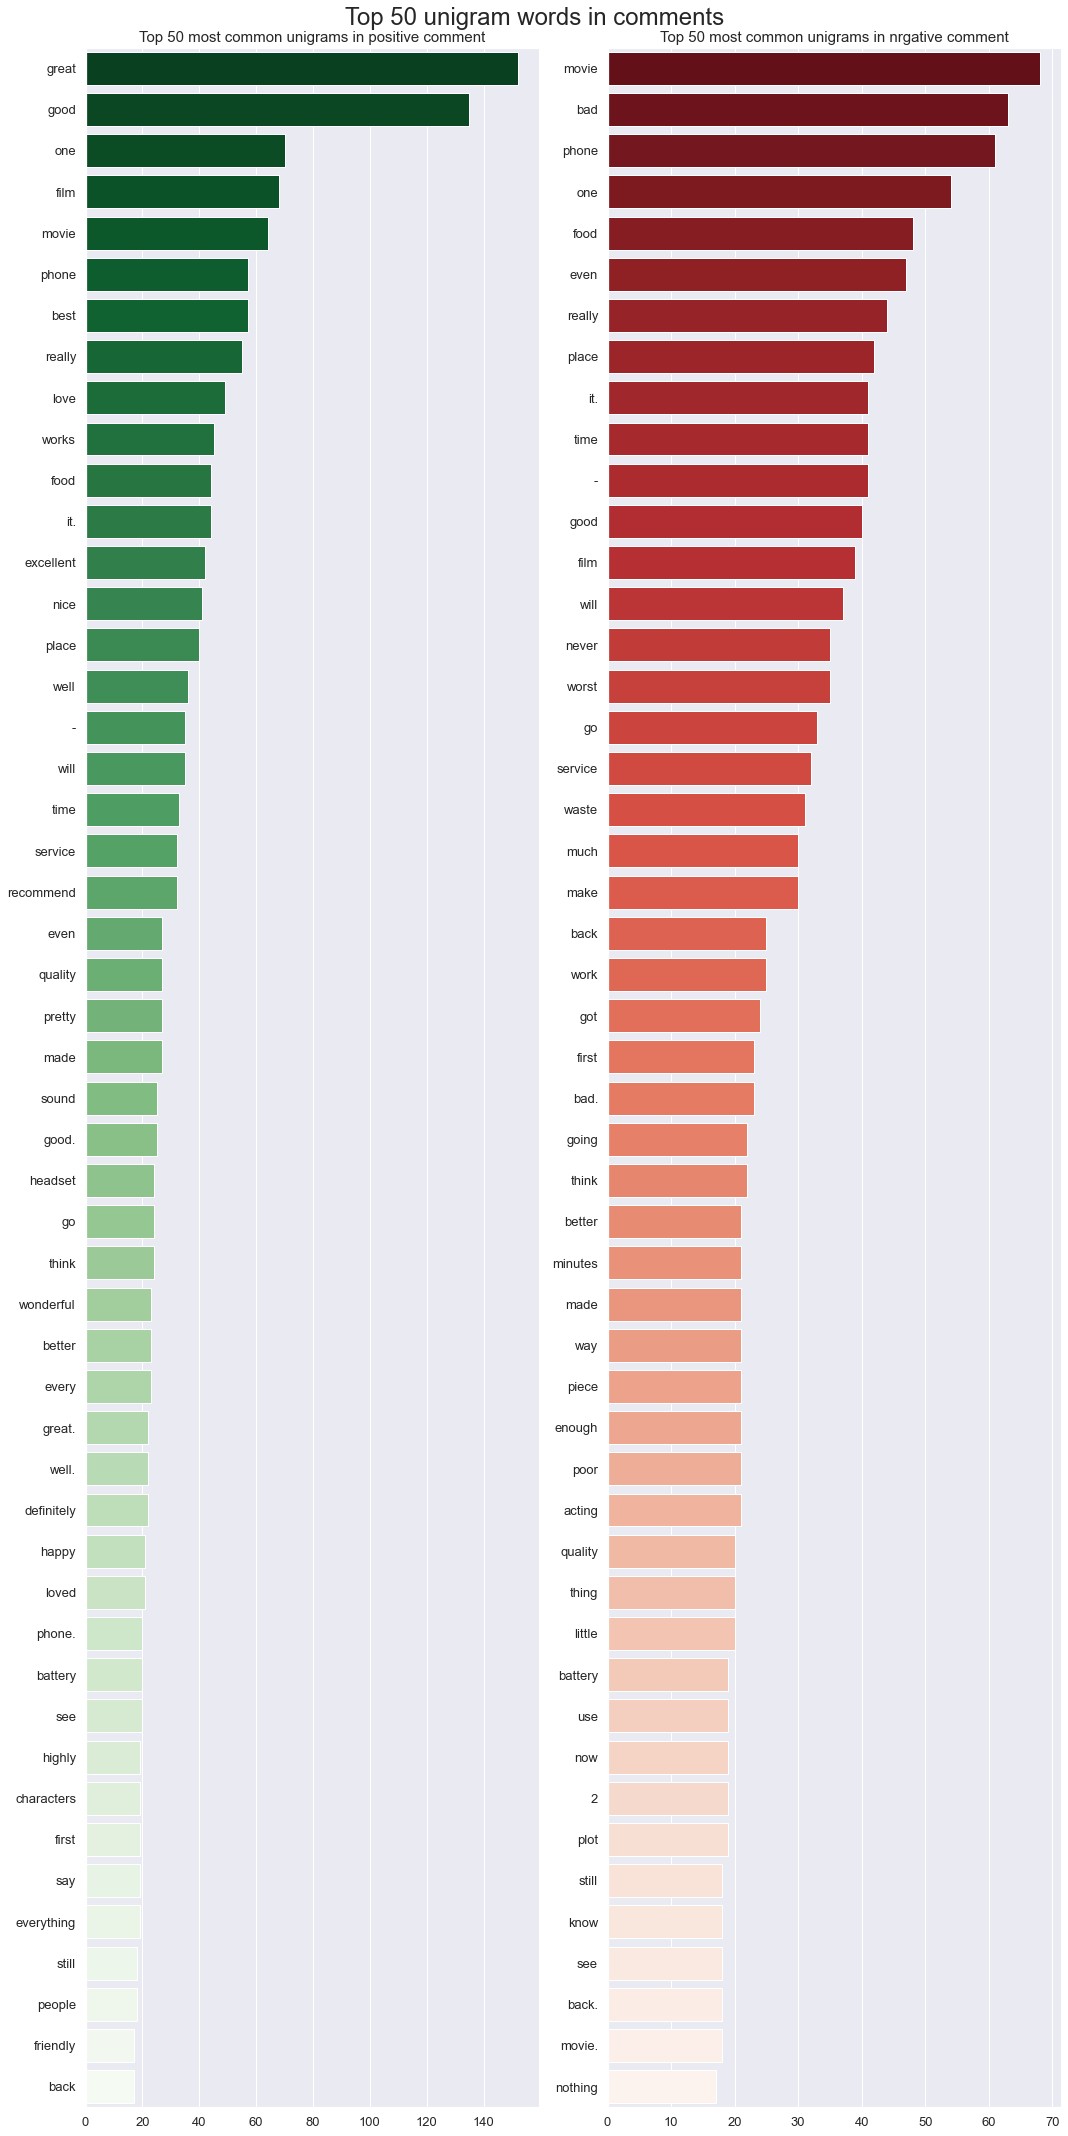

In [327]:
#draw the bar chart

#we will have two plots
fig, axes = plt.subplots(ncols=2, figsize=(15, 30))

sns.set_palette("Blues")
sns.barplot(y=df_positive_unigrams[0].values[:N], 
            x=df_positive_unigrams[1].values[:N], ax=axes[0],palette=("Greens_r"))

sns.barplot(y=df_negative_unigrams[0].values[:N], 
            x=df_negative_unigrams[1].values[:N], ax=axes[1],palette=("Reds_r"))

#set some labels and titles
for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in positive comment', fontsize=15)
axes[1].set_title(f'Top {N} most common unigrams in nrgative comment', fontsize=15)
fig.suptitle('Top 50 unigram words in comments', fontsize=24, va='baseline')
fig.tight_layout()

plt.show()

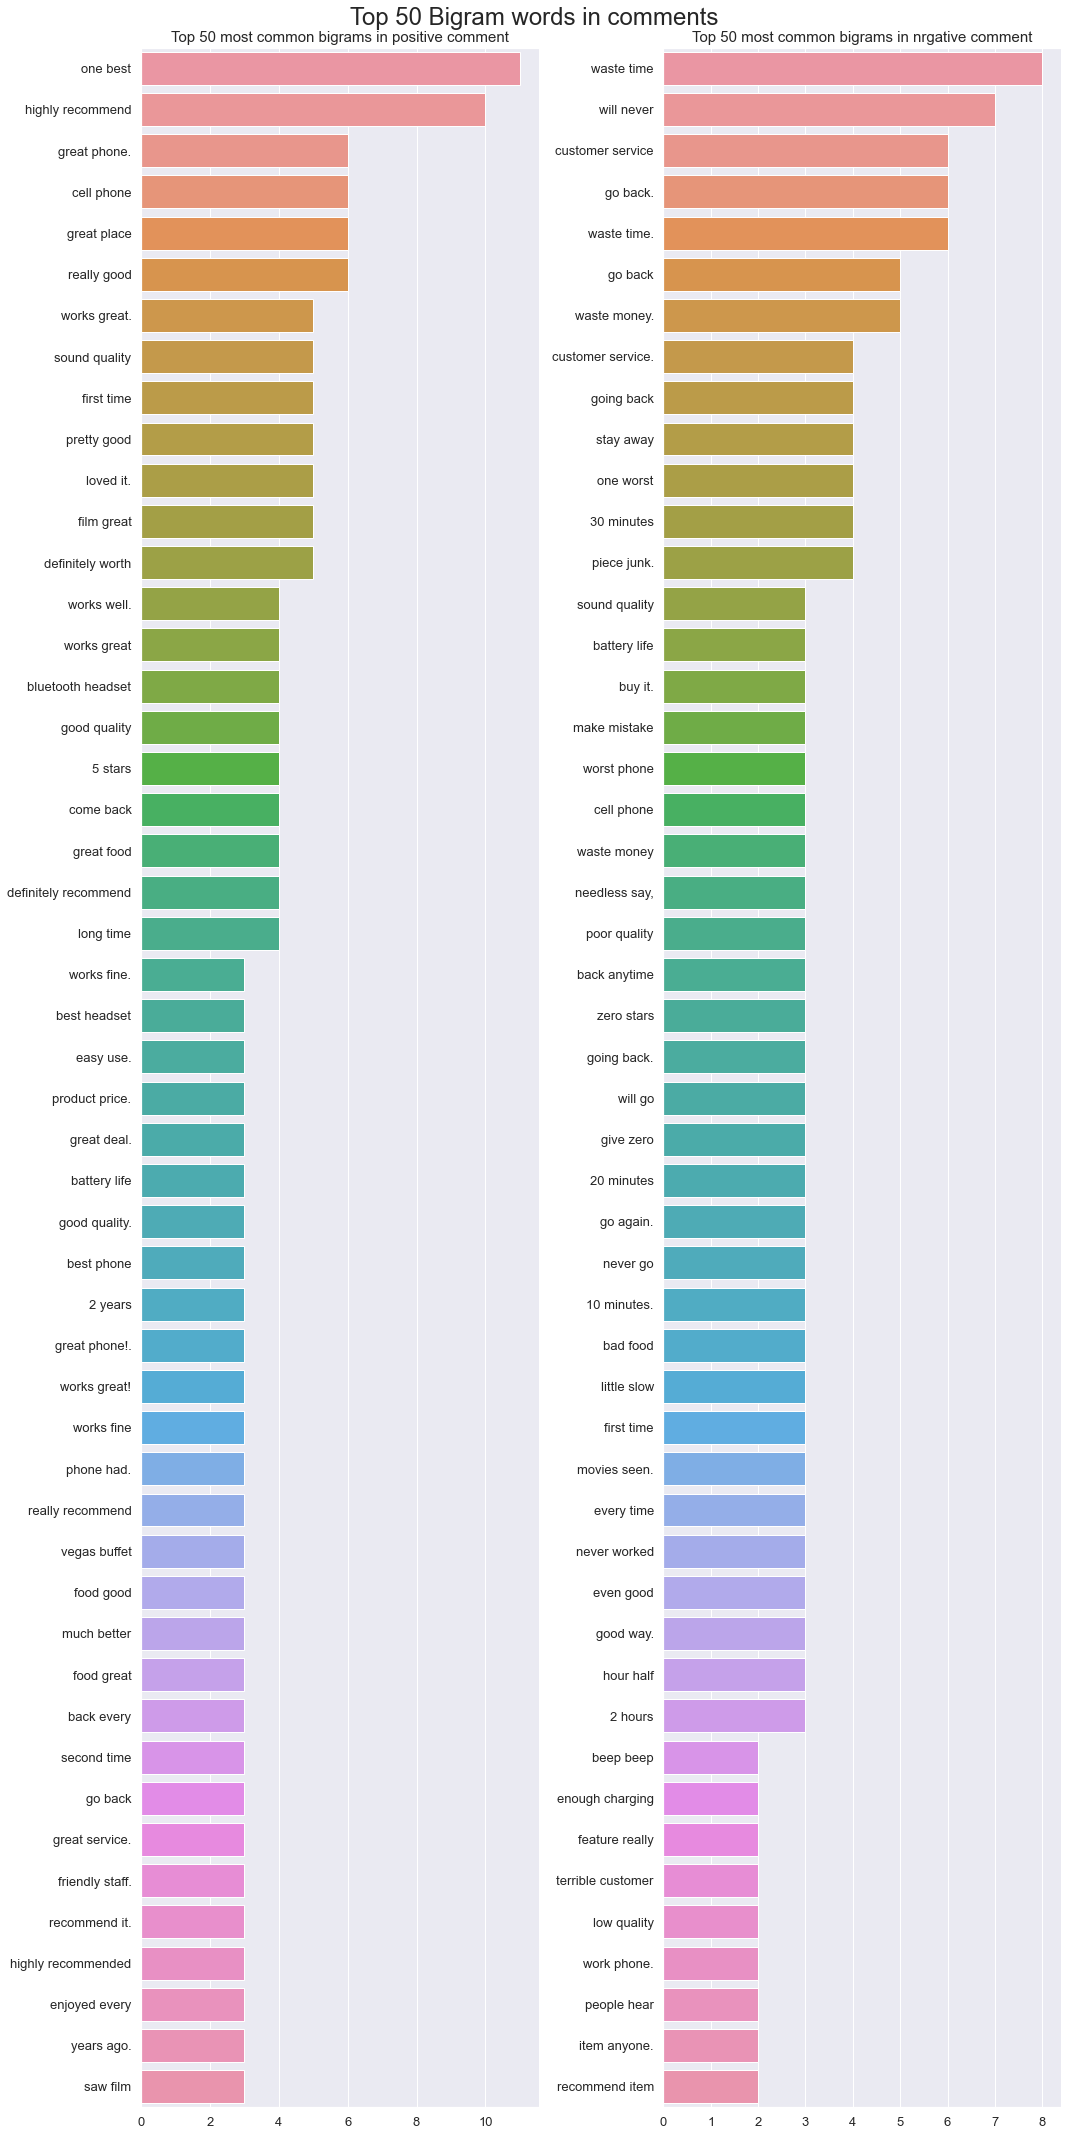

In [328]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 30))


#we will have two plots
sns.barplot(y=df_positive_bigrams[0].values[:N], 
            x=df_positive_bigrams[1].values[:N], ax=axes[0])

sns.barplot(y=df_negative_bigrams[0].values[:N], 
            x=df_negative_bigrams[1].values[:N], ax=axes[1])

#set some labels and titles
for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in positive comment', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in nrgative comment', fontsize=15)
fig.suptitle('Top 50 Bigram words in comments', fontsize=24, va='baseline')
fig.tight_layout()

plt.show()

# Word Cloud

In [334]:
# create corpus for word cloud
# divide by category
def create_corpus_df(df, target):
    corpus=[]
    
    for x in df[df['label']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [335]:
corpus_new1=create_corpus_df(df,1)
len(corpus_new1)

17666

In [336]:
corpus_new1[:10]

['The', 'best', 'scene', 'in', 'the', 'movie', 'was', 'when', 'Gerardo', 'is']

## Positive word cloud

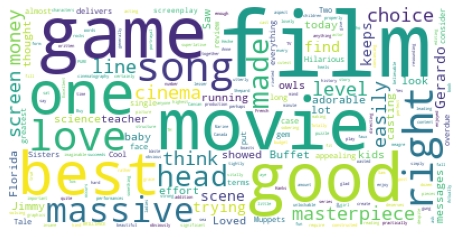

In [333]:
# draw word cloud figure
plt.figure(figsize=(8,6))
word_cloud = WordCloud(background_color='white',
                       max_font_size = 80
                      ).generate(" ".join(corpus_new1[:500]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [337]:
corpus_new0=create_corpus_df(df,0)
len(corpus_new0)

17829

In [338]:
corpus_new0[:10]

['A',
 'very,',
 'very,',
 'very',
 'slow-moving,',
 'aimless',
 'movie',
 'about',
 'a',
 'distressed,']

## Negative word cloud

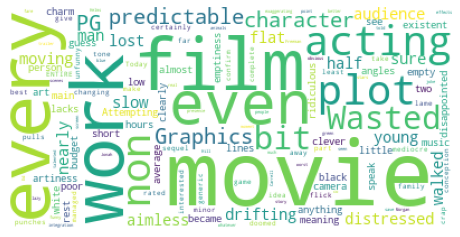

In [350]:
# draw word cloud figure
plt.figure(figsize=(8,6))
word_cloud = WordCloud(
                          background_color='white',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new0[:300]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [340]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction import DictVectorizer


# TF-IDF

In [341]:
corpus = df.text
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X_tfidf.shape)

['00' '10' '100' ... 'zillion' 'zombie' 'zombiez']
(3000, 5155)


In [342]:
analyze = tfidf_vectorizer.build_analyzer()
analyze("hello world!")

['hello', 'world']

In [343]:
# X = df.drop('label',axis = 1)
Y_tfidf = df['label']
X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(
    X_tfidf, Y_tfidf, test_size=0.25,random_state = 777)
mnb1 = MultinomialNB()
mnb1.fit(X_train_tfidf, Y_train_tfidf)


MultinomialNB()

In [344]:
print(list(mnb1.predict(X_test_tfidf))[0:10])
print(list(Y_test_tfidf)[0:10])


[0, 0, 1, 1, 0, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 0, 1, 1, 1, 1, 0]


In [345]:
mnb1.score(X_test_tfidf,Y_test_tfidf)

0.832

# Word frequency

In [346]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df.text)

In [347]:
Y_counts = df['label']
X_train_counts, X_test_counts, Y_train_counts, Y_test_counts = train_test_split(
    X_counts, Y_counts, test_size=0.25,random_state = 777)

mnb2 = MultinomialNB()
mnb2.fit(X_train_counts, Y_train_counts)

MultinomialNB()

In [348]:
print(list(mnb2.predict(X_test_counts))[0:10])
print(list(Y_test_counts)[0:10])

[0, 0, 1, 1, 0, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 0, 1, 1, 1, 1, 0]


In [349]:
mnb2.score(X_test_counts,Y_test_counts)

0.8213333333333334

# Comparison

The score of tf-idf is better than word frequency because it has more information in the matrix, word frequency matrix only concerns about the counts of words, but tf-idf matrix also contains the information of rarity called inverse document frequency(idf). That means when a word is rare, it will have higher idf value.